# i. Perkenalan

---


`Batch` : 008-HCK

`Dataset` : House Price Prediction

`Tujuan` : Membuat Model Clustering (K-Means) untuk melakukan segmentasi tipe penjualan rumah.


Setelah berhasil , saya simpan dalam bentuk File .csv dengan nama 'P1G6_Set_1_nicholas.csv'

# ii. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
import json



# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#model
from sklearn.cluster import KMeans

# Untuk membuat Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

# iv. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [5]:
#import data dengan read_csv dan masukan nama file csv nya.
data = pd.read_csv('melb_data.csv')
data.head(10) #menampilkan 10 data pertama

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [6]:
#menampilkan 10 data terakhir
data.tail(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,674.0,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0
13571,Wantirna South,15 Mara Cl,4,h,1330000.0,S,Barry,26/08/2017,14.7,3152.0,...,2.0,2.0,717.0,191.0,1980.0,NaN,-37.86887,145.22116,Eastern Metropolitan,7082.0
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [7]:
# Duplicate Data
dataduplicate = data.copy()

In [8]:
# Melihat Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Insight :
- Pada tabel tersebut , terdapat total 21 Kolom , dengan 12 Kolom bertipe data float , 8 kolom bertipe string dan 1 data bertipe integer.
- Jumlah entry data sebanyak 13580 entries
- memory usage sebesar 629,4 KB

In [13]:
dataduplicate['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [6]:
# Melihat deskripsi data
dataduplicate.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [7]:
#cek data duplikat
data.duplicated().sum()

0

Tidak terdapat data duplikat.

In [8]:
#melihat unique value pada data dengan for loop
for i in data.columns:
    print(i , len(data[i].unique()))

Suburb 314
Address 13378
Rooms 9
Type 3
Price 2204
Method 5
SellerG 268
Date 58
Distance 202
Postcode 198
Bedroom2 12
Bathroom 9
Car 12
Landsize 1448
BuildingArea 603
YearBuilt 145
CouncilArea 34
Lattitude 6503
Longtitude 7063
Regionname 8
Propertycount 311


# vi. Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### 1. Memilih feature yang akan dimasukan kedalam model clustering


In [9]:
data2 = dataduplicate[['Rooms','Type','Price','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']]

### 2. Check Data Duplicate

In [10]:
data2.duplicated().sum()

20

In [11]:
#drop data duplicate
data3= data2.drop_duplicates()

In [12]:
#mengecek data duplikat setelah di drop
data3.duplicated().sum()

0

Data Duplikat berhasil di hapus

### 3. Check dan Handle Missing Value

##### A. Check

In [13]:
data3.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6445
YearBuilt        5371
Propertycount       0
dtype: int64

In [14]:
# Menghitung median dari kolom 'BuildingArea'

median_building_area = data3['BuildingArea'].median()
mode_year_built = data3['YearBuilt'].mode()[0]  # [0] digunakan untuk mendapatkan nilai modus pertama jika ada beberapa nilai modus


# Mengganti nilai yang hilang dengan median
data3['BuildingArea'].fillna(median_building_area, inplace=True)
#mengganti nilai yang hilang dengan modus
data3['YearBuilt'].fillna(mode_year_built, inplace=True)
#mengisi nilai yang hilang dengan 0 , kemungkinan properti tidak memiliki garasi
data3['Car'].fillna(0, inplace=True)

In [15]:
#cek missing value setelah di handle
data3.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

In [16]:
#melihat persentasi data yang memiliki missing value setelah di handle
data3.isnull().sum()
print('----------------------------------------\n Percentage of missing data: \n')
print((data3[['Car', 'BuildingArea','YearBuilt']].isnull().sum()/13580)*100)

----------------------------------------
 Percentage of missing data: 

Car             0.0
BuildingArea    0.0
YearBuilt       0.0
dtype: float64


### 4. Handling Outlier

In [17]:
#karena hanya data numerikal yang akan di lakukan handling outlier, maka data kategorikal di drop.
dataoutlier = data3.drop(columns = ['Type','Method'])

In [18]:
# mencari banyak outlier dengan IQR
Q1 = dataoutlier.quantile(0.25)
Q3 = dataoutlier.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = dataoutlier[(dataoutlier < LB) | (dataoutlier > UB)].count()
print('Number of Outliers at each column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(No_Outliers, columns=['(No. Outliers)'])
# To show whole rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Number of Outliers at each column:

--------------------------------------------------
               (No. Outliers)
Rooms                     682
Price                     612
Distance                  414
Bedroom2                  655
Bathroom                  143
Car                       643
Landsize                  367
BuildingArea             5554
YearBuilt                3969
Propertycount             358


`Karena jumlah Outliernya banyak , maka akan dilakukan Capping agar tidak kehilangan banyak informasi dengan mendrop outlier`

In [19]:
#cek skewness data
dataoutlier.skew()

Rooms              0.376625
Price              2.239588
Distance           1.674015
Bedroom2           0.774714
Bathroom           1.378126
Car                1.349368
Landsize          95.170726
BuildingArea     107.053442
YearBuilt         -2.176314
Propertycount      1.069214
dtype: float64

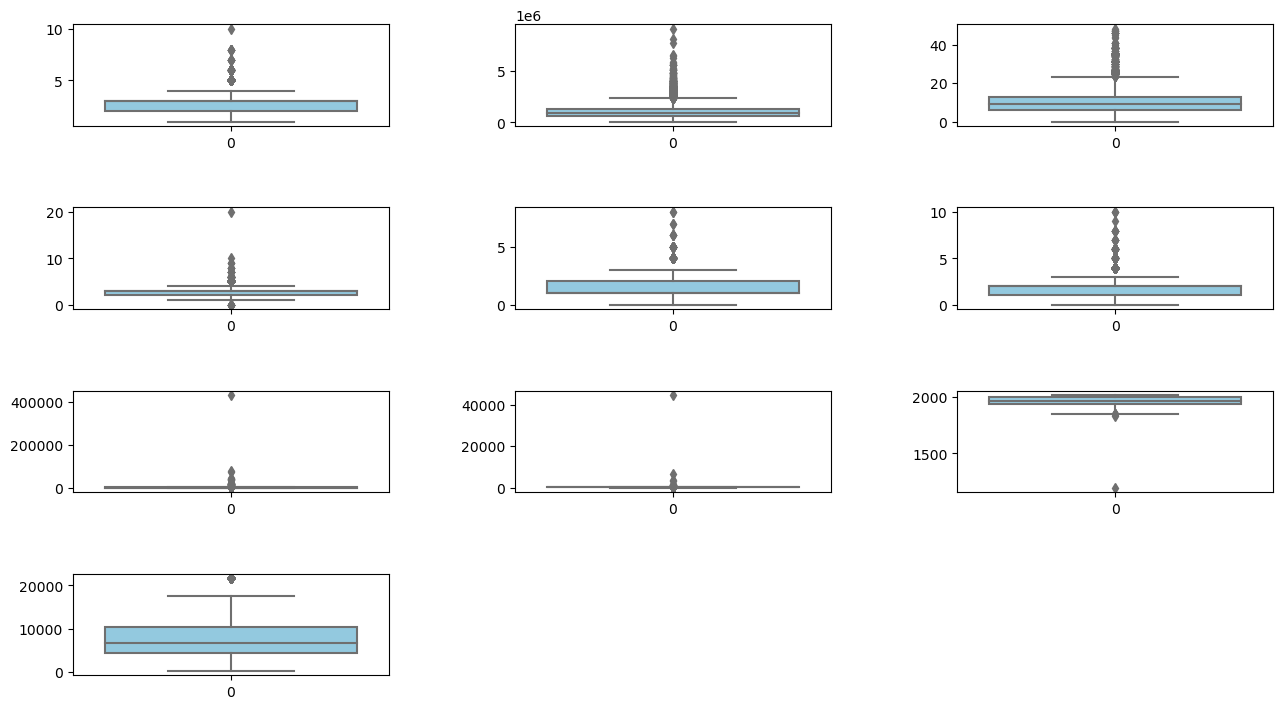

In [20]:
#visualisasi untuk melihat outlier
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i,column in enumerate(dataoutlier.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(dataduplicate[column], color='skyblue')

In [21]:
normal = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in dataoutlier:  # untuk mencari kolom mana yang skewed atau normal
    skewness = dataoutlier[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

In [22]:
print(f'Kolom Numerik yang termasuk dalam skewed adalah {skewed}')
print(f'Kolom Numerik yang termasuk dalam normal adalah {normal}')

Kolom Numerik yang termasuk dalam skewed adalah ['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']
Kolom Numerik yang termasuk dalam normal adalah ['Rooms']


Untuk Data yang terdistribusi normal akan dilakukan Capping dengan metode gaussian.

In [23]:
# Handling outlier dengan menggunakan metode caping gaussian untuk data yang berdistribusi normal
Capping_normal = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= normal)

Capping_normal = Capping_normal.fit_transform(dataoutlier[normal])

Untuk Data yang tidak terdistribusi normal / skewed , akan dilakukan Capping dengan metode iqr

In [24]:
# Handling outlier dengan menggunakan metode caping iqr untuk data yang berdistribusi tidak normal
Capping_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables= skewed)

Capping_skewed = Capping_skewed.fit_transform(dataoutlier[skewed])

Menggabungkan kembali data Normal dan Skewed, untuk selanjutnya dilakukan Scaling

In [25]:
# Menggabungkan data normal dan skewed
datacapped = pd.concat([Capping_normal,Capping_skewed],axis = 1)
datacapped

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2.0,1480000.0,2.5,2.0,1.0,1.0,202.0,126.000,1970.0,4019.0
1,2.0,1035000.0,2.5,2.0,1.0,0.0,156.0,98.735,1915.0,4019.0
2,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.000,1915.0,4019.0
3,3.0,850000.0,2.5,3.0,2.0,1.0,94.0,126.000,1970.0,4019.0
4,4.0,1600000.0,2.5,3.0,1.0,2.0,120.0,142.000,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...
13575,4.0,1245000.0,16.7,4.0,2.0,2.0,652.0,126.000,1981.0,7392.0
13576,3.0,1031000.0,6.8,3.0,2.0,2.0,333.0,133.000,1995.0,6380.0
13577,3.0,1170000.0,6.8,3.0,2.0,4.0,436.0,126.000,1997.0,6380.0
13578,4.0,2500000.0,6.8,4.0,1.0,5.0,866.0,153.020,1920.0,6380.0


In [26]:
#melihat skew data setelah di capping
datacapped.skew()

Rooms            0.231450
Price            1.483556
Distance         1.368526
Bedroom2         0.247155
Bathroom         1.211617
Car              0.871394
Landsize         1.606423
BuildingArea     0.013524
YearBuilt       -0.394699
Propertycount    1.069214
dtype: float64

Masih ada data yang skewed, tapi sudah kita minimalisir dibandingkan sebelum dilakukan capping.

#### 5. OHE

In [27]:
dataencoder = data3[['Type','Method']]
ohenc = OneHotEncoder(sparse=False)
ohe_df = pd.DataFrame(ohenc.fit_transform(dataencoder))
ohe_df.columns = ohenc.get_feature_names_out(input_features=dataencoder.columns)

### 7. Feature Scaling

Karena datanya hampir mendekati normal , saya akan menggunakan MinMaxScaler.

In [28]:
scaler = MinMaxScaler()
datascaled = scaler.fit_transform(datacapped)

In [29]:
#melihat data yang sudah di scaling
datascaled

array([[0.20809081, 0.42465753, 0.0746826 , ..., 0.50225661, 0.53398058,
        0.17615999],
       [0.20809081, 0.2891933 , 0.0746826 , ..., 0.        , 0.        ,
        0.17615999],
       [0.41618161, 0.42009132, 0.0746826 , ..., 0.94436769, 0.        ,
        0.17615999],
       ...,
       [0.41618161, 0.33028919, 0.20313667, ..., 0.50225661, 0.7961165 ,
        0.28648194],
       [0.62427242, 0.73515982, 0.20313667, ..., 1.        , 0.04854369,
        0.28648194],
       [0.62427242, 0.3652968 , 0.18820015, ..., 0.24435848, 0.04854369,
        0.29409841]])

In [30]:
MinMax_Scaler_df = pd.DataFrame(datascaled, columns=datacapped.columns)
MinMax_Scaler_df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,0.208091,0.424658,0.074683,0.333333,0.2,0.2,0.097443,0.502257,0.533981,0.176160
1,0.208091,0.289193,0.074683,0.333333,0.2,0.0,0.075253,0.000000,0.000000,0.176160
2,0.416182,0.420091,0.074683,0.500000,0.4,0.0,0.064641,0.944368,0.000000,0.176160
3,0.416182,0.232877,0.074683,0.500000,0.4,0.2,0.045345,0.502257,0.533981,0.176160
4,0.624272,0.461187,0.074683,0.500000,0.2,0.4,0.057887,0.796997,0.961165,0.176160
...,...,...,...,...,...,...,...,...,...,...
13555,0.624272,0.353120,0.498880,0.666667,0.4,0.4,0.314520,0.502257,0.640777,0.333769
13556,0.416182,0.287976,0.203137,0.500000,0.4,0.4,0.160637,0.631206,0.776699,0.286482
13557,0.416182,0.330289,0.203137,0.500000,0.4,0.8,0.210323,0.502257,0.796117,0.286482
13558,0.624272,0.735160,0.203137,0.666667,0.2,1.0,0.417752,1.000000,0.048544,0.286482


#### 7. Concat

In [31]:
datafinal = pd.concat([MinMax_Scaler_df,ohe_df],axis = 1)
datafinal

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,0.208091,0.424658,0.074683,0.333333,0.2,0.2,0.097443,0.502257,0.533981,0.176160,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.208091,0.289193,0.074683,0.333333,0.2,0.0,0.075253,0.000000,0.000000,0.176160,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.416182,0.420091,0.074683,0.500000,0.4,0.0,0.064641,0.944368,0.000000,0.176160,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.416182,0.232877,0.074683,0.500000,0.4,0.2,0.045345,0.502257,0.533981,0.176160,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.624272,0.461187,0.074683,0.500000,0.2,0.4,0.057887,0.796997,0.961165,0.176160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13555,0.624272,0.353120,0.498880,0.666667,0.4,0.4,0.314520,0.502257,0.640777,0.333769,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13556,0.416182,0.287976,0.203137,0.500000,0.4,0.4,0.160637,0.631206,0.776699,0.286482,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13557,0.416182,0.330289,0.203137,0.500000,0.4,0.8,0.210323,0.502257,0.796117,0.286482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13558,0.624272,0.735160,0.203137,0.666667,0.2,1.0,0.417752,1.000000,0.048544,0.286482,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 6. PCA

`PCA adalah teknik reduksi dimensi yang umum digunakan dalam analisis data dan machine learning. Tujuan utama dari PCA adalah untuk mengurangi jumlah fitur (variabel) dalam dataset sambil mempertahankan sebanyak mungkin informasi asli.Tujuannya adalah untuk mengurangi dimensi dan peningkatan kinerka model.`

In [32]:
# Melakukan reduksi dimensi dengan PCA
pca = PCA()
pca.fit(datafinal)

PCA()

In [33]:
# Melihat ukuran data sebelum di pca
datafinal.shape

(13560, 18)

Text(0, 0.5, 'Eigenvalues')

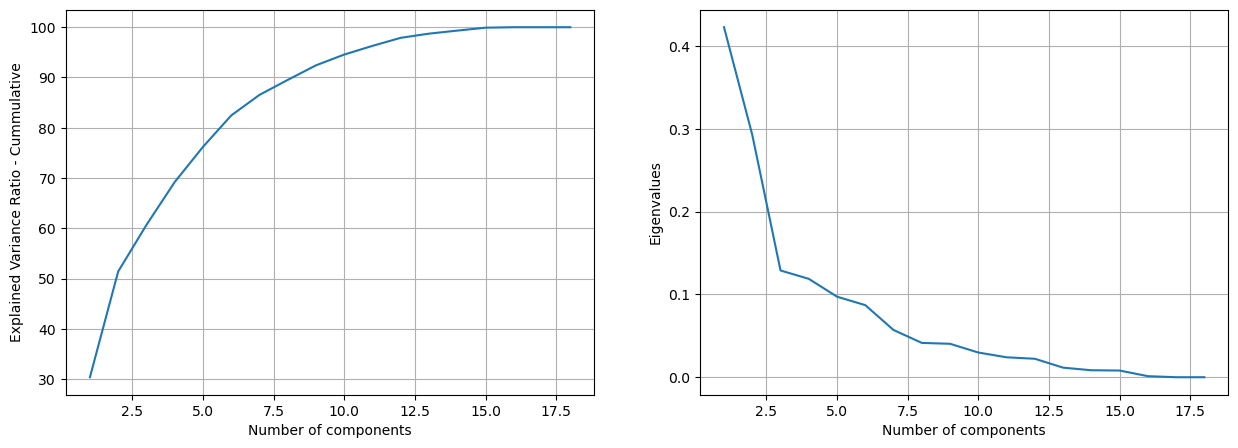

In [34]:
# Membuat plot Kumulatif dari Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 19), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Melihat hubungan jumlah komponen dengan eigenvalue
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 19), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Saya akan menetapkan angka 90% sebagai treshold, artinya hasil dari PCA nanti dapat menggambarkan data nya sebanyak 90% dibanding sebelum dilakukan dimensional reduksi. Saya menetapkan 90% karena tidak ingin kehilangan terlalu banyak informasi dari data.

In [35]:
#melihat komponen yang dibutuhkan untuk memenuhi 90%
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.9) + 1
print(f'Jumlah Komponen yang diperlukan untuk menggambarkan 90% data adalah {num_features} Komponen')

Jumlah Komponen yang diperlukan untuk menggambarkan 90% data adalah 9 Komponen


In [36]:
# melatih model dengan komponen yang sudah ditentukan sebelumnya (9)

pca_comp = PCA(n_components=9)

reduced_data = pca_comp.fit_transform(datafinal)

# vii. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

`Alasan menggunakan adalah K-Means:`
- K-Means adalah algoritma pengelompokan yang sederhana dan efisien.
- Cocok untuk dataset dengan jumlah sampel yang besar dan berdimensi tinggi.
- Hasil kelompoknya dapat diinterpretasikan dengan mudah dan jelas

`Hyperparameter yang dipakai:`
- Jumlah Kelompok (n_clusters): Menentukan jumlah kelompok yang diinginkan.
- Inisialisasi Centroid (init)
- Jumlah Iterasi Maksimum (max_iter): Menentukan jumlah iterasi maksimum untuk konvergensi algoritma.

`Penggunaan Metrics:`
- Inertia (within-cluster sum of squares):
- Silhouette Score

#### A. Elbow Method

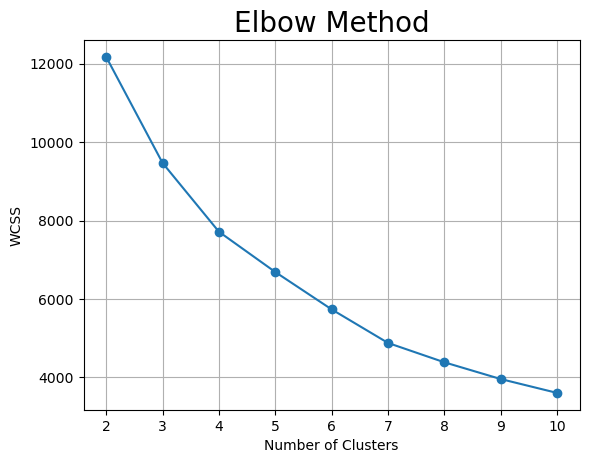

In [37]:
#melihat nilai k terbaik berdasarkan metode elbow

wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1): #melakukan for loop dengan range 2-11

# Model definition
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
# Model training
    km.fit(reduced_data)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

`INSIGHT :`
Menurut Elbow Method dan Penilaian pribadi saya , Elbow / Siku terletak pada **Jumlah Cluster = 4** , namun ini belum keputusan final dalam memilih Cluster, karena sekali lagi elbow method memiliki kekurangan yaitu penilaiannya tergantung orang yang melihat nya , sehingga perlu juga dilakukan perhitungan pasti menggunakan Silhouette Method.

#### B. Silhouette Plot & Silhouette Score

In [38]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3693365863458833
For n_clusters = 3 The average silhouette_score is : 0.376826301241045
For n_clusters = 4 The average silhouette_score is : 0.42861238484688113
For n_clusters = 5 The average silhouette_score is : 0.4603850403593555
For n_clusters = 6 The average silhouette_score is : 0.4827854695361731
For n_clusters = 7 The average silhouette_score is : 0.5139907451858478
For n_clusters = 8 The average silhouette_score is : 0.3676676373666212
For n_clusters = 9 The average silhouette_score is : 0.3861949617702807


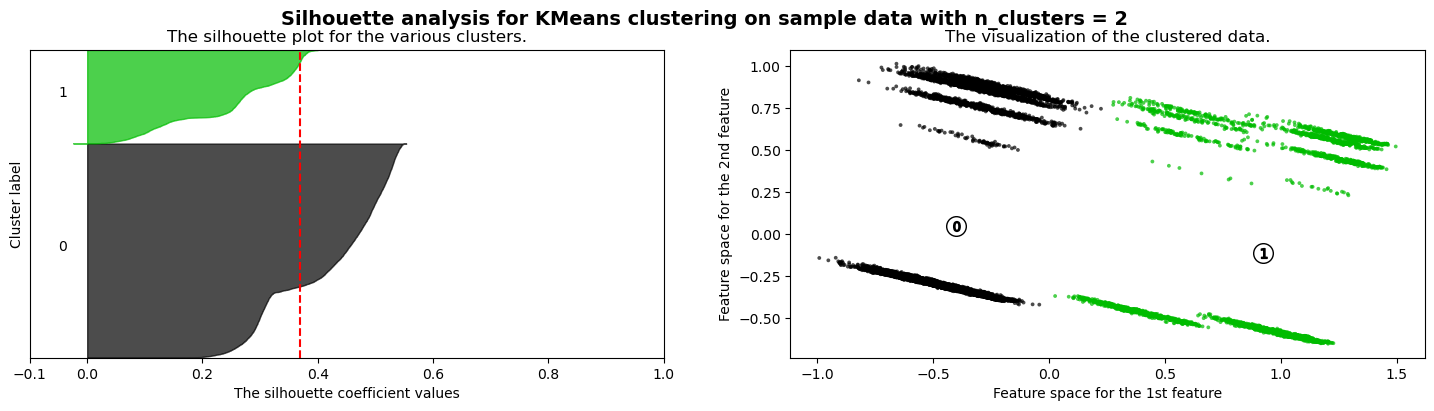

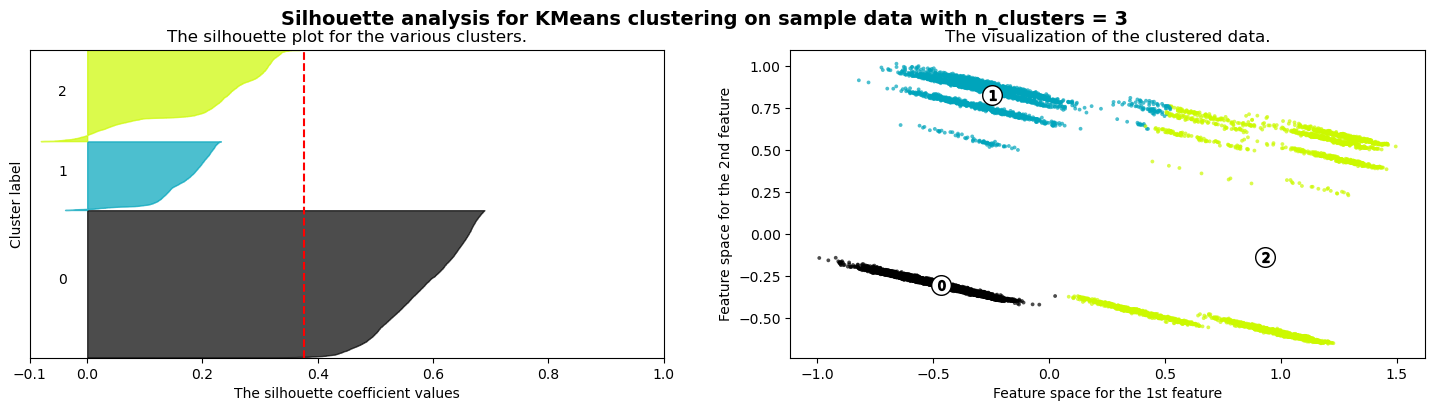

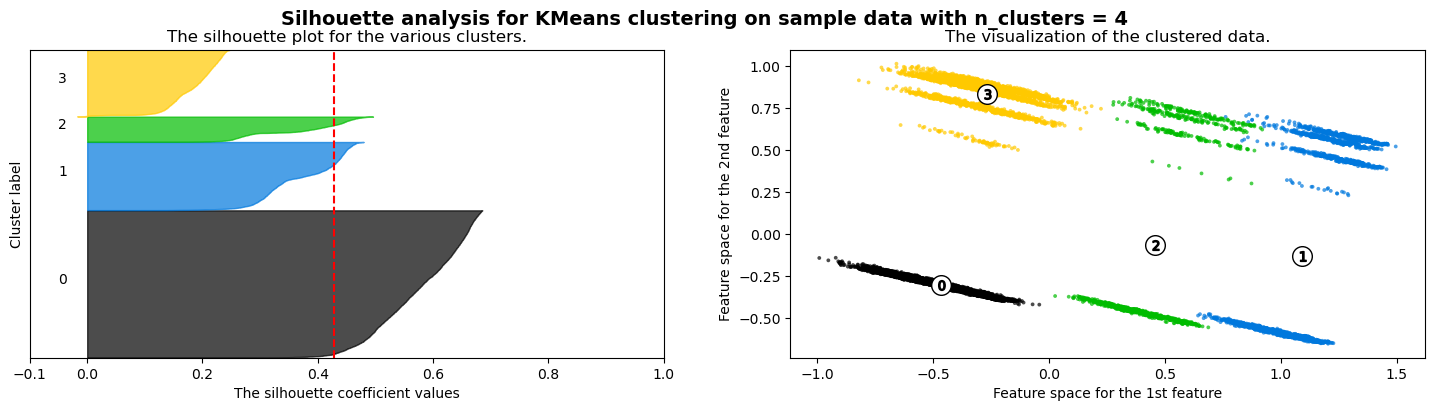

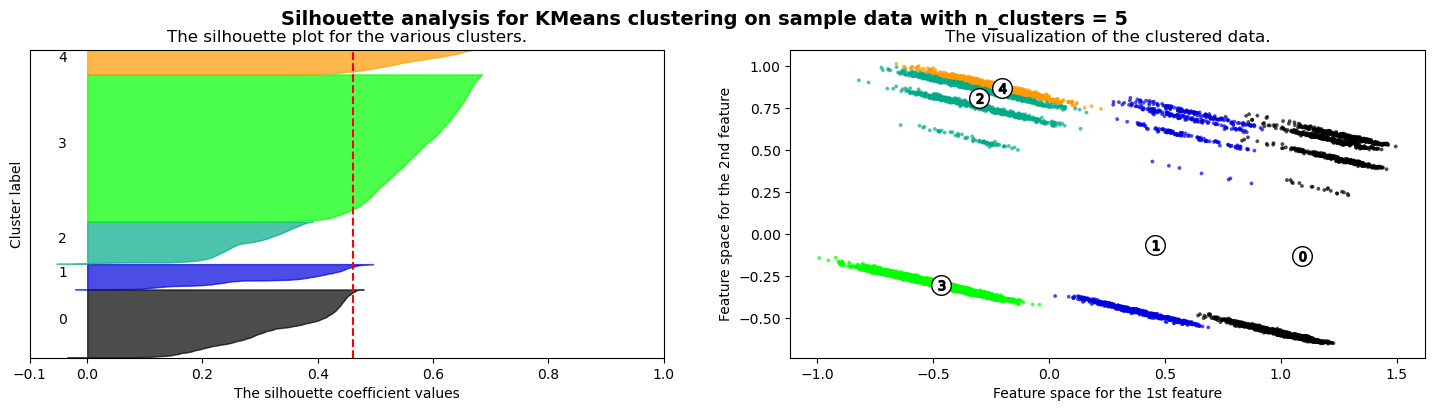

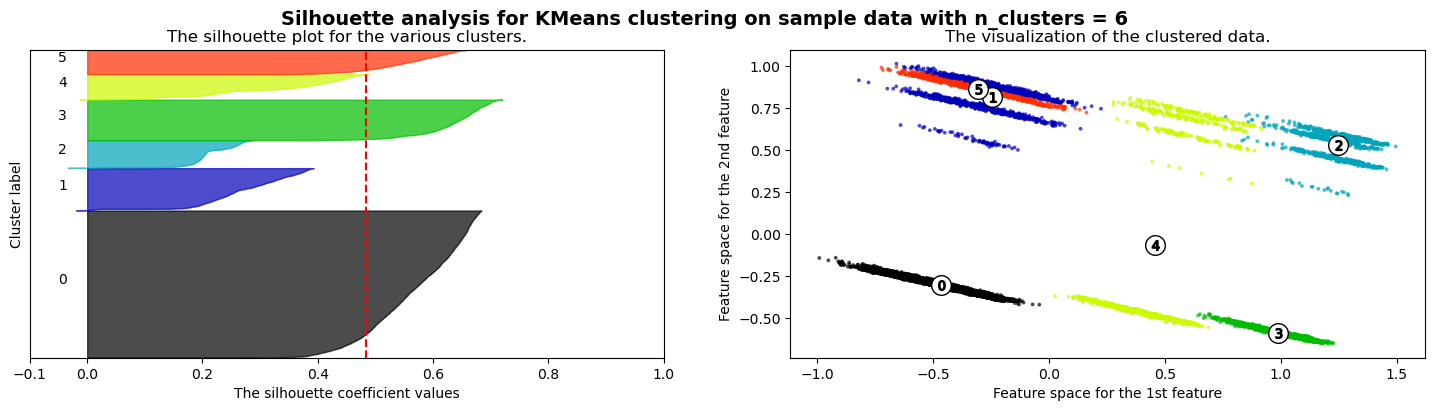

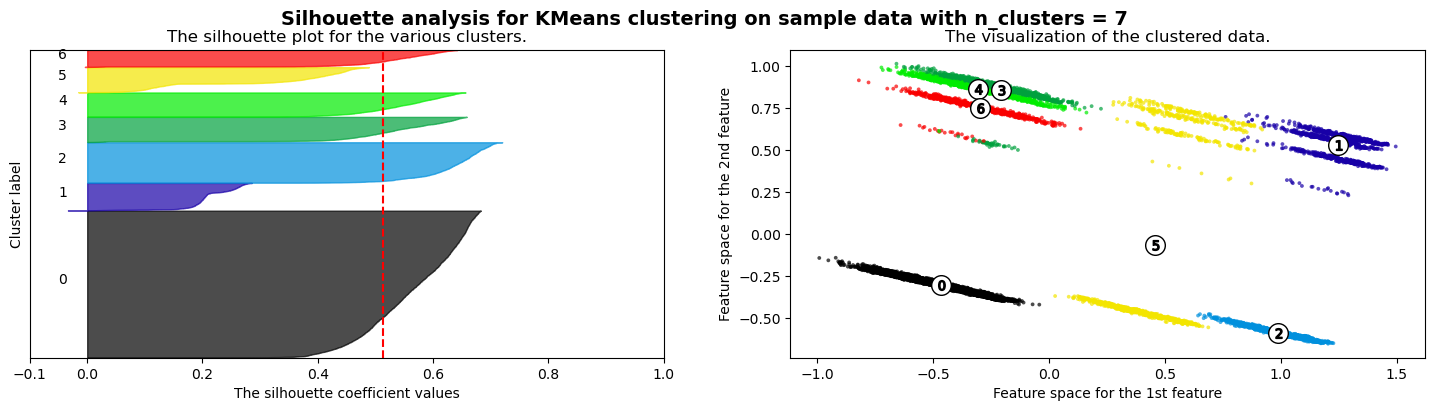

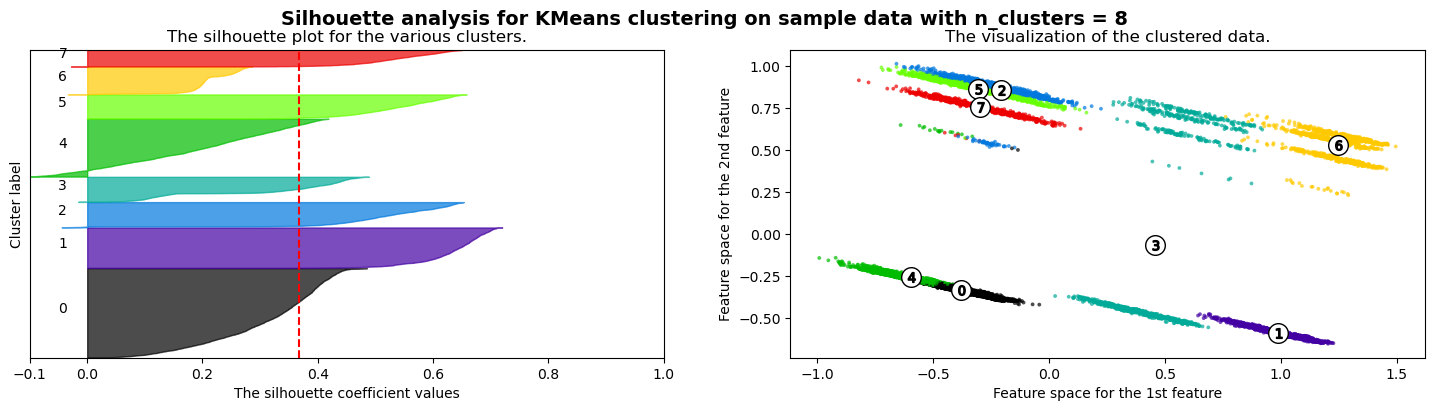

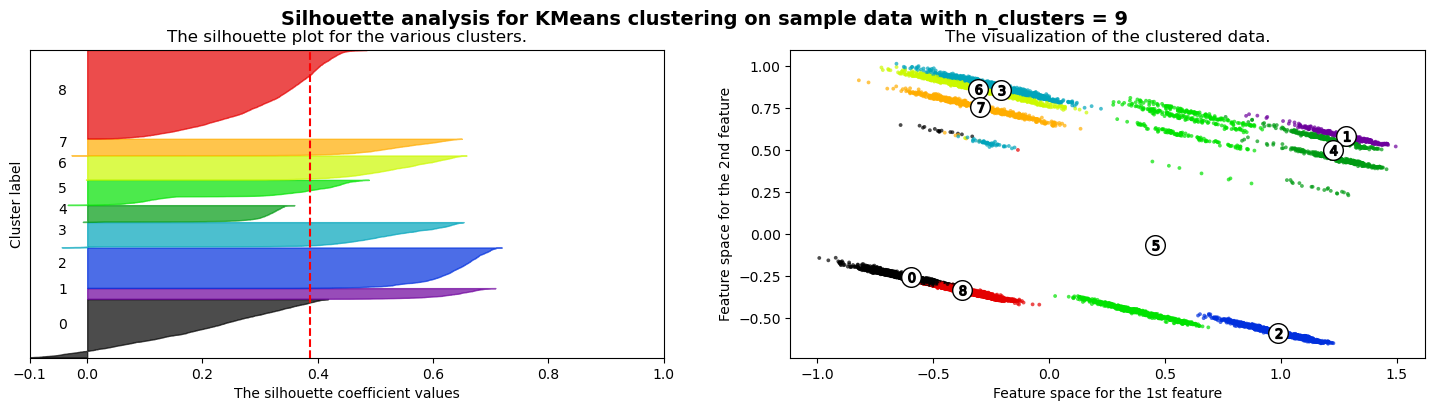

In [39]:
# Menampilkan Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), reduced_data, random_state)

`INSIGHT:`
- Dari Nilai Silhouette score, yang paling tinggi adalah n-cluster = 5
- Dari Visualisasi plot silhouette , saya memutuskan mengambil `n-cluster = 4` karena pada n cluster = 5 masih banyak data yang bercampur, seperti contoh ada banyak cluster 0 yang masuk kedalam cluster 1
- Sedangkan pada n-cluster = 4 memang masih ada beberapa data yang terlihat masuk ke cluster sebelahnya namun lebih sedikit dan lebih stabil.

# viii. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



In [40]:
data3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,4019.0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,4019.0
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,16.7,4.0,2.0,2.0,652.0,126.0,1981.0,7392.0
13576,3,h,1031000.0,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,3,h,1170000.0,S,6.8,3.0,2.0,4.0,436.0,126.0,1997.0,6380.0
13578,4,h,2500000.0,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0


In [41]:
# # Create a pipeline for data preprocessing and clustering
# pipeline = Pipeline([
#     ('winsorizer', Winsorizer(capping_method='gaussian', 
#                             # Cap both tails
#                              tail='both',
#                              fold=3,
#                              variables=data3['Rooms'])),
#     ('winsorizer1', Winsorizer(capping_method='iqr', 
#                             # Cap both tails
#                              tail='both',
#                              fold=3,
#                              variables=data3['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'])),
    
#     ('scaler', MinMaxScaler(variables=data3['Rooms','Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'])),  # Standardize data

#     ('onehot',OneHotEncoder(variables= data3['Type','Method'])),
    
#     # K-Means model with 3 clusters
#     ('kmeans_model', KMeans(n_clusters=4, random_state=10))  
# ])

# # Train the pipeline on the RFM_Table data and perform clustering
# pipeline.fit(data3)

# # Add a 'cluster' column to the original DataFrame to store cluster assignments
# data3['cluster'] = pipeline.predict(data3)

# # Display the result of clustering
# data3

In [42]:
# Melakukan training pada model K-Means dengan nilai k terbaik yang sudah dipilih yaitu 4
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
pred = km.fit_predict(reduced_data) #definisikan ke variabel pred
pred

array([0, 0, 3, ..., 0, 3, 3])

In [43]:
km.n_iter_

7

`n_iter = 7` menunjukkan bahwa algoritma K-Means telah menjalani 7 iterasi sebelum mencapai konvergensi. Ini berarti bahwa dalam proses klasterisasi data, pusat-pusat klaster dan anggota klaster telah dihitung ulang dan diperbarui sebanyak 7 kali sebelum tidak ada perubahan signifikan dalam klasterisasi data yang ditemukan.

# ix. EDA dengan hasil Clustering

In [44]:
# satukan hasil clustering dengan Data set original dengan menambahkan kolom 'cluster'

data3['cluster'] = pred
data3.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,cluster
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,4019.0,0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,3
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,4019.0,3
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,3


#### Melihat distribusi cluster pada data

In [45]:
data3['cluster'].value_counts()

0    6503
1    3010
3    2936
2    1111
Name: cluster, dtype: int64

In [46]:
cluster_0 = 6503 / 13560 * 100
cluster_1 = 3010 / 13560 * 100
cluster_3 = 2936 / 13560 * 100
cluster_2 = 1111 / 13560 * 100


In [47]:
print(cluster_0)

47.95722713864306


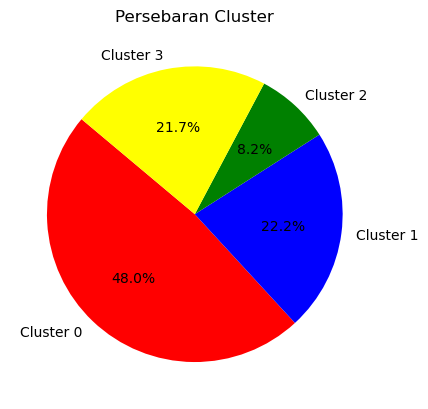

In [48]:
# Data contoh persebaran cluster (misalnya, persentase data dalam setiap cluster)
cluster_sizes = [cluster_0, cluster_1,cluster_2,cluster_3]

# Warna untuk setiap cluster
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Label untuk setiap cluster
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Membuat pie chart
plt.pie(cluster_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Persebaran Cluster')

# Menampilkan pie chart
plt.show()

#### Visualisasi Data dengan n_components=9 dan Cluster = 4

<Axes: >

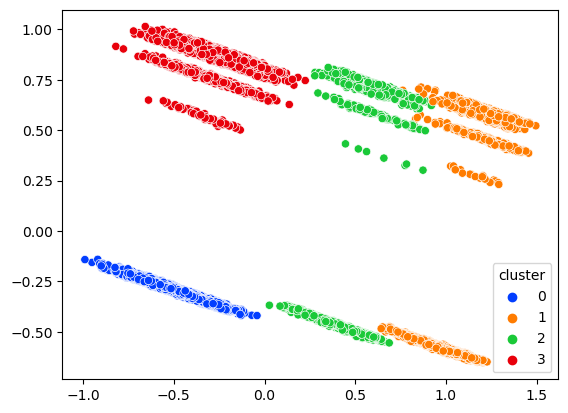

In [49]:
#visualisasikan cluster

pca_2d = PCA(n_components=9)
pca_2d.fit(reduced_data)

scaled_pca_2d = pca_2d.fit_transform(reduced_data)

sns.scatterplot(x=scaled_pca_2d[:,0], y=scaled_pca_2d[:,1], hue=data3['cluster'], palette='bright')

In [50]:
data3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,cluster
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,4019.0,0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,3
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,4019.0,3
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,16.7,4.0,2.0,2.0,652.0,126.0,1981.0,7392.0,0
13576,3,h,1031000.0,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,3
13577,3,h,1170000.0,S,6.8,3.0,2.0,4.0,436.0,126.0,1997.0,6380.0,0
13578,4,h,2500000.0,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,3


In [51]:
fitur_list = ['Rooms', 'Price', 'Distance', 'Bedroom2','Bathroom','Car','BuildingArea','YearBuilt','Propertycount'] 


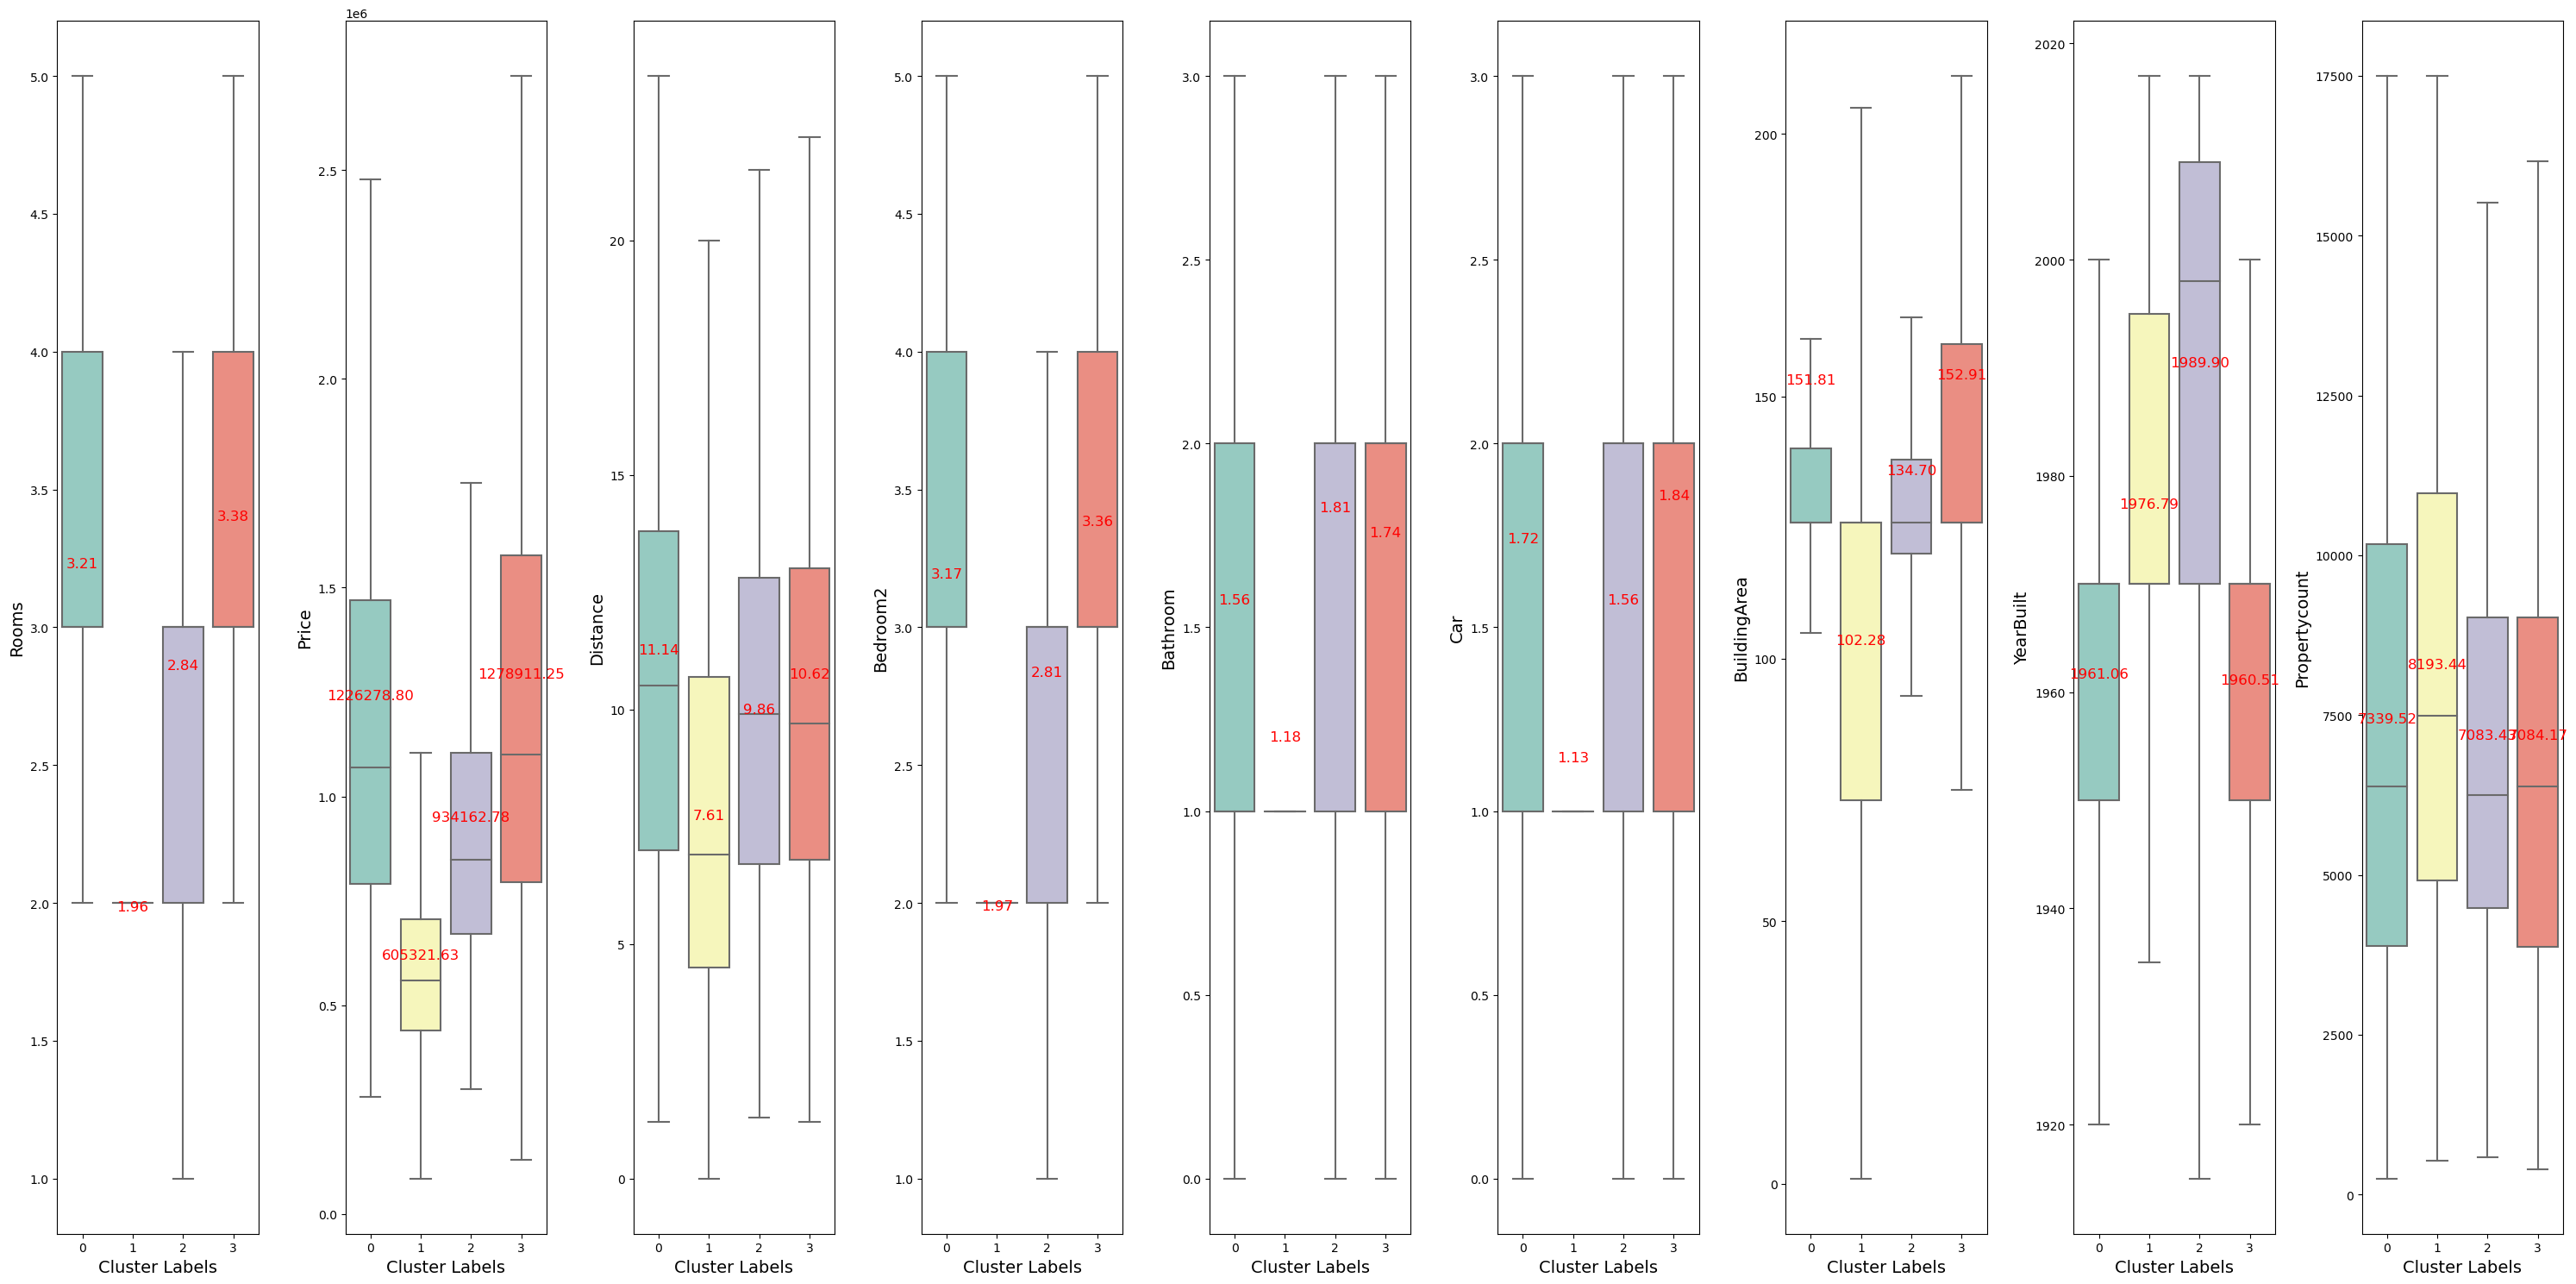

In [52]:
plt.figure(figsize=(30, 15))
for i, fitur in enumerate(fitur_list, 1):
    plt.subplot(1, len(fitur_list), i)
    sns.boxplot(x='cluster', y=fitur, data=data3, showfliers=False, palette='Set3')  # Menghilangkan outliers dan menggunakan palet warna Set3
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    

    means = data3.groupby('cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='red', fontsize=12)

plt.tight_layout()
plt.show()

cluster  Method
0        S         6503
1        PI         361
         S         1791
         SA          19
         SP         476
                   ... 
2        VB         107
3        PI        1069
         SA          66
         SP        1073
         VB         728
Length: 15, dtype: int64


Text(0.5, 1.0, 'Method In Each Cluster')

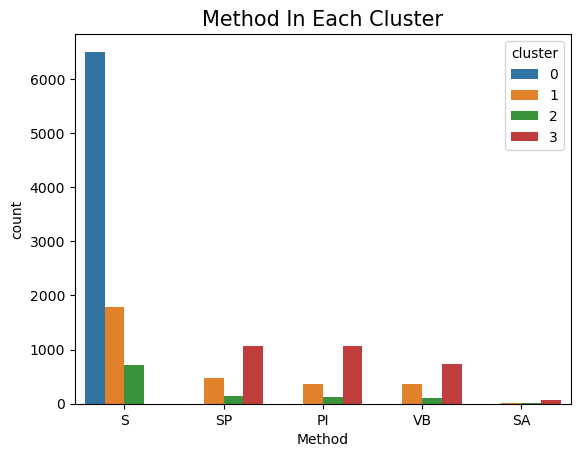

In [53]:
print(data3.groupby(['cluster','Method']).size())
familySizecount = sns.countplot(x=data3['Method'],hue=data3['cluster'])
familySizecount.set_title("Method In Each Cluster", size=15)

cluster  Type
0        h       6503
1        u       3010
2        t       1111
3        h       2936
dtype: int64


Text(0.5, 1.0, 'Auction Types  In Each Cluster')

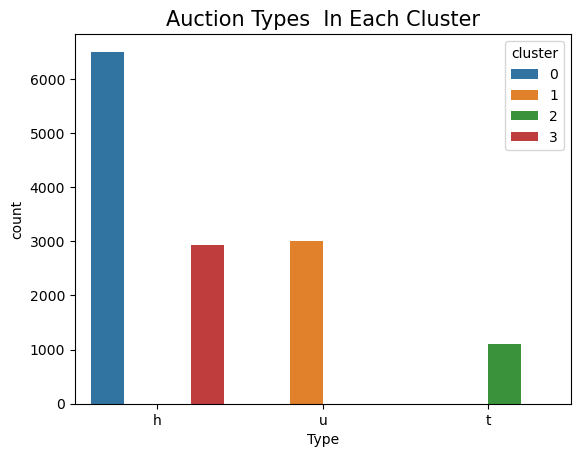

In [54]:
print(data3.groupby(['cluster','Type']).size())
familySizecount = sns.countplot(x=data3['Type'],hue=data3['cluster'])
familySizecount.set_title("Auction Types  In Each Cluster", size=15)

cluster  Rooms
0        1          32
         2        1028
         3        3421
         4        1657
         5         323
                  ... 
3        5         268
         6          32
         7           5
         8           4
         10          1
Length: 28, dtype: int64


Text(0.5, 1.0, 'Rooms In Each Cluster')

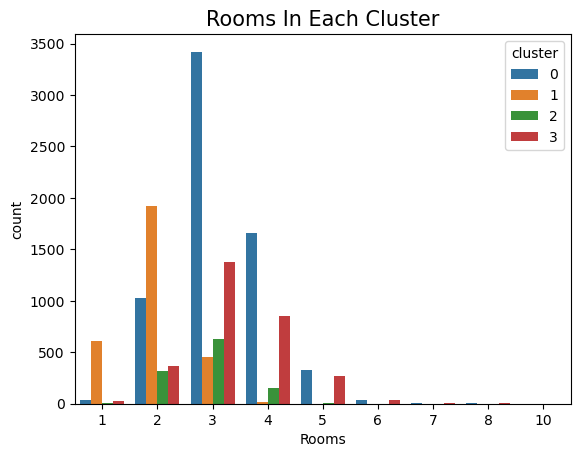

In [55]:
print(data3.groupby(['cluster','Rooms']).size())
familySizecount = sns.countplot(x=data3['Rooms'],hue=data3['cluster'])
familySizecount.set_title("Rooms In Each Cluster", size=15)

Avg Age of each cluster :  green
cluster
0    1.226279e+06
1    6.053216e+05
2    9.341628e+05
3    1.278911e+06
Name: Price, dtype: float64
None
--------------------------------------------------
Maximum Age of each cluster :  green
cluster
0    7650000.0
1    3625000.0
2    3475000.0
3    9000000.0
Name: Price, dtype: float64
None
--------------------------------------------------
Minimum Age of each cluster :  green
cluster
0    280500.0
1     85000.0
2    300000.0
3    131000.0
Name: Price, dtype: float64
None
--------------------------------------------------


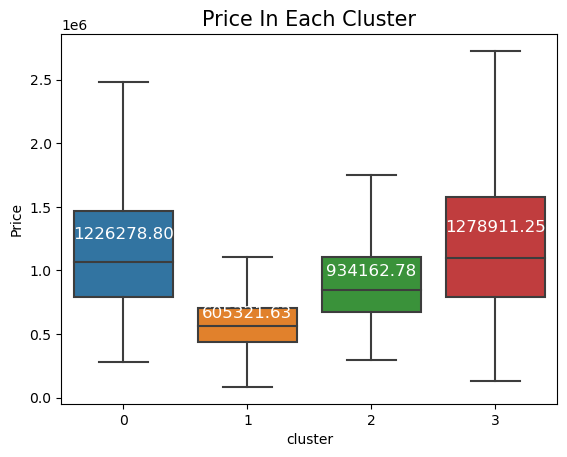

In [56]:
print('Avg Age of each cluster : ','green')
print(print(data3.groupby(['cluster'])['Price'].agg('mean')))
print('-'*50)
print('Maximum Age of each cluster : ','green')
print(print(data3.groupby(['cluster'])['Price'].agg('max')))
print('-'*50)
print('Minimum Age of each cluster : ','green')
print(print(data3.groupby(['cluster'])['Price'].agg('min')))
print('-'*50)

agebox=sns.boxplot(x=data3["cluster"], y=data3["Price"],showfliers=False)
agebox.set_title("Price In Each Cluster", size=15)

means = data3.groupby('cluster')['Price'].mean().values
for j, mean in enumerate(means):
    plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='white', fontsize=12)


<Axes: title={'center': 'Presentase Balance Frequency Berdasarkan Cluster'}, ylabel='Propertycount'>

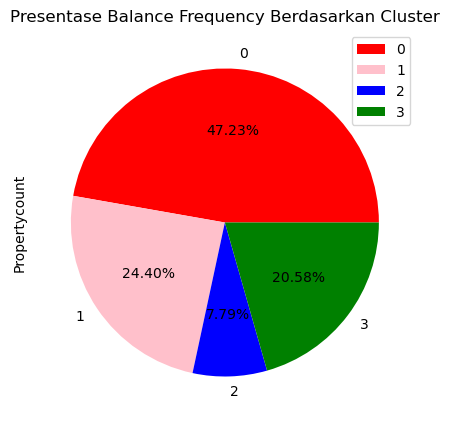

In [57]:
fig,ax1 = plt.subplots(figsize=(5,5))
data3.groupby(['cluster']).sum().plot(kind='pie', y='Propertycount', autopct='%.2f%%',ax=ax1,
                                colors = ['red', 'pink', 'blue','green'],
                                title='Presentase Balance Frequency Berdasarkan Cluster')

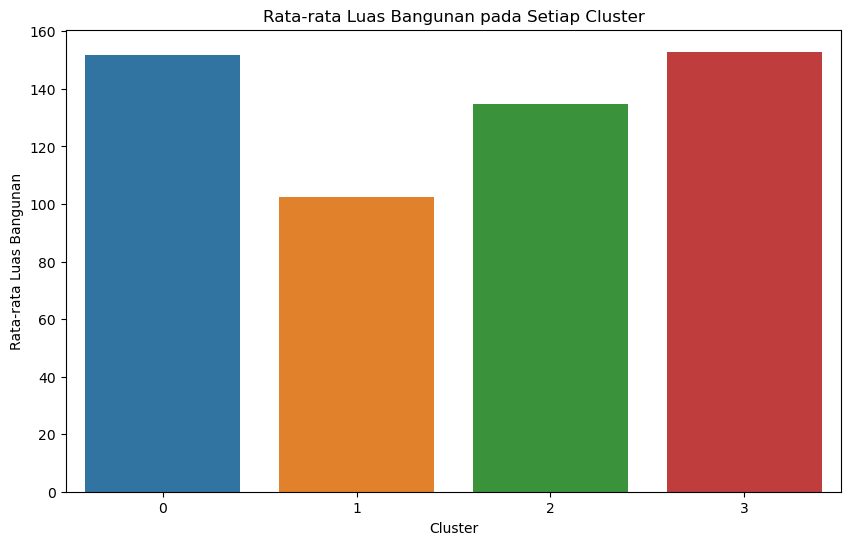

In [58]:
cluster_means = data3.groupby('cluster')['BuildingArea'].mean()  # Ganti 'mean()' dengan 'median()' jika ingin median
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Luas Bangunan')
plt.title('Rata-rata Luas Bangunan pada Setiap Cluster')
plt.show()

In [59]:
print('Avg BuildingArea of each cluster : ','green')
print(print(data3.groupby(['cluster'])['BuildingArea'].agg('mean')))

Avg BuildingArea of each cluster :  green
cluster
0    151.813062
1    102.276944
2    134.698269
3    152.913360
Name: BuildingArea, dtype: float64
None


#### a. Bagaimana Cluster mempengaruhi pembelian sekali bayar?

In [60]:
oop_df = data3.groupby(['cluster']).agg({'Bedroom2': 'mean','Rooms': 'mean','Bathroom':'mean'})
# a = 229.052120 / 310.757849	 * 100
# b = 1148.802845	 / 2079.615822 * 100
# c = 247.456097 / 	352.111029 * 100
# persen = [a,b,c]
# oop_df['Persentase'] = persen
# oop_df
oop_df

,Bedroom2,Rooms,Bathroom
cluster,,,
0,3.170075,3.207289,1.556666
1,1.966777,1.964120,1.183389
2,2.814581,2.837984,1.809181
3,3.360354,3.379428,1.740123


In [61]:
oop_df2 = data3.groupby(['cluster']).agg({'Price':'mean'})
# a = 229.052120 / 310.757849	 * 100
# b = 1148.802845	 / 2079.615822 * 100
# c = 247.456097 / 	352.111029 * 100
# persen = [a,b,c]
# oop_df['Persentase'] = persen
# oop_df
oop_df2

,Price
cluster,
0,1.226279e+06
1,6.053216e+05
2,9.341628e+05
3,1.278911e+06


In [62]:
oop_df2 = data3.groupby(['cluster']).agg({'Propertycount': 'mean'})
# a = 229.052120 / 310.757849	 * 100
# b = 1148.802845	 / 2079.615822 * 100
# c = 247.456097 / 	352.111029 * 100
# persen = [a,b,c]
# oop_df['Persentase'] = persen
# oop_df
oop_df2

,Propertycount
cluster,
0,7339.520837
1,8193.441196
2,7083.432943
3,7084.166553


In [63]:
oop_df2 = data3.groupby(['cluster']).agg({'YearBuilt': 'mean'})
# a = 229.052120 / 310.757849	 * 100
# b = 1148.802845	 / 2079.615822 * 100
# c = 247.456097 / 	352.111029 * 100
# persen = [a,b,c]
# oop_df['Persentase'] = persen
# oop_df
oop_df2

,YearBuilt
cluster,
0,1961.063970
1,1976.786047
2,1989.903690
3,1960.507834


In [64]:
data3['cluster'].value_counts()

0    6503
1    3010
3    2936
2    1111
Name: cluster, dtype: int64

# x. Model Evaluations

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [65]:
km.inertia_

7715.285244564046

`INSIGHT:`
- Terlihat bahwa nilai inertia pada kluster saya sebesar 3379.167.Pada konsep teorinya semakin kecil nilai intertia /SSE maka semakin mendekati nilai tengah cluster ,tetapi hal ini tidak menjadi patokan , kita bisa melihat dari faktor-faktor lain untuk mengetahui apakah cluster kita baik atau buruk.

- Menurut elbow method k = 4 adalah yang paling optimal, Tetapi saya belum bisa menentukan nilai K hanya dari Elbow method saja ,Saya perlu melihat dari plot Silhoutte,Silhoutte score dan juga visualisasi data clustering yang cocok menurut bisnis knowledge.

- Pada nilai silhouette score adalah k = 2,namun kemudian dilihat dari silhouette plot dan visualisasi data clustering k terbaik adalah 3 karena hanya sedikit data yang bercampur antara cluster . Hal ini yang menjadi pertimbangan saya mengapa saya tidak mengambil k = 3 .

- Mungkin kedepannya bisa dicoba untuk cara handling outlier yang berbeda, karena model ini sensitif terhadap outlier. Bisa juga dilakukan trial and error menggunakan Nilai K yang lain seperti nilai k=6 yang terlihat bagus juga.

# xi. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [66]:
data3

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,cluster
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,4019.0,0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,3
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,4019.0,3
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,16.7,4.0,2.0,2.0,652.0,126.0,1981.0,7392.0,0
13576,3,h,1031000.0,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,3
13577,3,h,1170000.0,S,6.8,3.0,2.0,4.0,436.0,126.0,1997.0,6380.0,0
13578,4,h,2500000.0,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,3


In [67]:
kategorical= ['Type','Method']
numerikal = ['Rooms','Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

In [71]:
# Untuk menyimpan model kita menggunakan module pickle

with open('scaler_cluster.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) 

with open('model_kmeans.pkl', 'wb') as file_2:
  pickle.dump(km, file_2) 

with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca_comp, file_3)

with open('onehot.pkl', 'wb') as file_4:
  pickle.dump(ohenc, file_4) 

with open('list_kategorikal.txt', 'w') as file_5:
  json.dump(kategorical, file_5)

with open('list_data_numerical.txt', 'w') as file_6:
  json.dump(numerikal, file_6)

In [69]:
data3 

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,cluster
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,4019.0,0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,3
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,4019.0,3
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,16.7,4.0,2.0,2.0,652.0,126.0,1981.0,7392.0,0
13576,3,h,1031000.0,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,3
13577,3,h,1170000.0,S,6.8,3.0,2.0,4.0,436.0,126.0,1997.0,6380.0,0
13578,4,h,2500000.0,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,3
